In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_excel('Sales_Data.xlsx')

In [4]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2018-02-24,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2018-05-07,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2018-07-01,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2018-08-25,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,2018-10-28,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium


In [5]:
df.shape

(2747, 20)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ORDERNUMBER           2747 non-null   int64         
 1   QUANTITYORDERED       2747 non-null   int64         
 2   PRICEEACH             2747 non-null   float64       
 3   ORDERLINENUMBER       2747 non-null   int64         
 4   SALES                 2747 non-null   float64       
 5   ORDERDATE             2747 non-null   datetime64[ns]
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64         
 7   STATUS                2747 non-null   object        
 8   PRODUCTLINE           2747 non-null   object        
 9   MSRP                  2747 non-null   int64         
 10  PRODUCTCODE           2747 non-null   object        
 11  CUSTOMERNAME          2747 non-null   object        
 12  PHONE                 2747 non-null   object        
 13  ADDRESSLINE1      

In [7]:
df.describe().round()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,MSRP
count,2747.0,2747.0,2747.0,2747.0,2747.0,2747,2747.0,2747.0
mean,10260.0,35.0,101.0,6.0,3553.0,2019-05-13 21:56:17.211503360,1757.0,101.0
min,10100.0,6.0,27.0,1.0,482.0,2018-01-06 00:00:00,42.0,33.0
25%,10181.0,27.0,69.0,3.0,2204.0,2018-11-08 00:00:00,1077.0,68.0
50%,10264.0,35.0,96.0,6.0,3185.0,2019-06-24 00:00:00,1761.0,99.0
75%,10334.0,43.0,127.0,9.0,4503.0,2019-11-17 00:00:00,2436.0,124.0
max,10425.0,97.0,253.0,18.0,14083.0,2020-05-31 00:00:00,3562.0,214.0
std,92.0,10.0,42.0,4.0,1839.0,NaN,819.0,40.0


In [8]:
df.columns = df.columns.str.lower()

In [9]:
df.columns = [col.capitalize() for col in df.columns]

In [10]:
df.columns

Index(['Ordernumber', 'Quantityordered', 'Priceeach', 'Orderlinenumber',
       'Sales', 'Orderdate', 'Days_since_lastorder', 'Status', 'Productline',
       'Msrp', 'Productcode', 'Customername', 'Phone', 'Addressline1', 'City',
       'Postalcode', 'Country', 'Contactlastname', 'Contactfirstname',
       'Dealsize'],
      dtype='object')

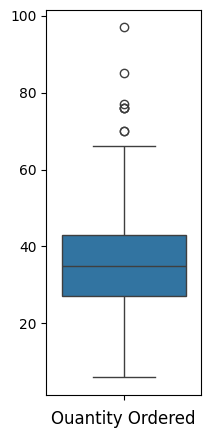

In [61]:
plt.figure(figsize=(2,5))
sns.boxplot(y = df['Quantityordered'], width=0.8);
plt.xlabel('Ouantity Ordered', fontsize = 12);
plt.ylabel(None);

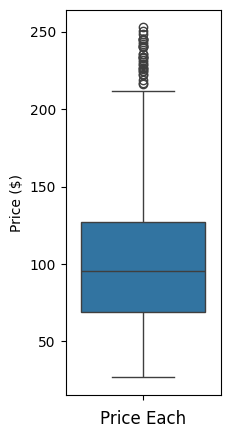

In [62]:
plt.figure(figsize=(2,5))
sns.boxplot(y = df['Priceeach'], width=0.8);
plt.xlabel('Price Each', fontsize = 12);
plt.ylabel('Price ($)');

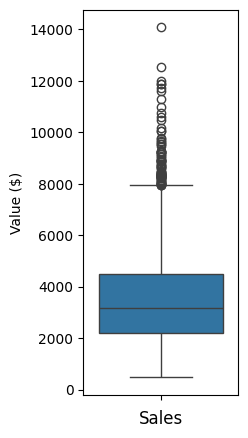

In [69]:
plt.figure(figsize=(2,5))
sns.boxplot(y = df['Sales'], width=0.8);
plt.xlabel('Sales', fontsize = 12);
plt.ylabel('Value ($)');

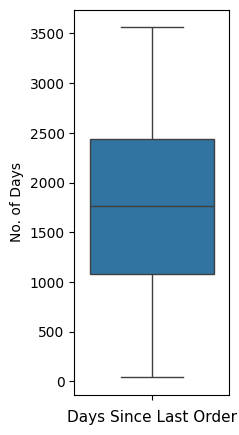

In [71]:
plt.figure(figsize=(2,5))
sns.boxplot(y = df['Days_since_lastorder'], width=0.8);
plt.xlabel('Days Since Last Order', fontsize = 11);
plt.ylabel('No. of Days');

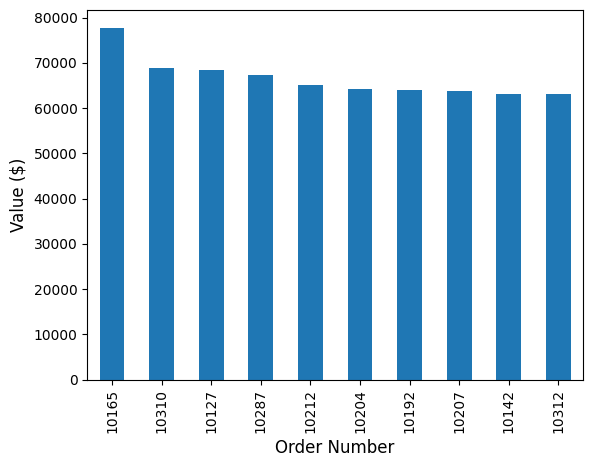

In [68]:
df.groupby('Ordernumber')['Sales'].sum().sort_values(ascending=False).head(10).plot(kind='bar');
plt.xlabel('Order Number', fontsize = 12);
plt.ylabel('Value ($)', fontsize=12);

In [ ]:
df['Status'].value_counts().plot(kind='bar');

In [ ]:
df['Productline'].value_counts().plot(kind='bar');
plt.xlabel('Product Line', fontsize = 11);
plt.ylabel('Count', fontsize=11);
plt.xticks(rotation=30);

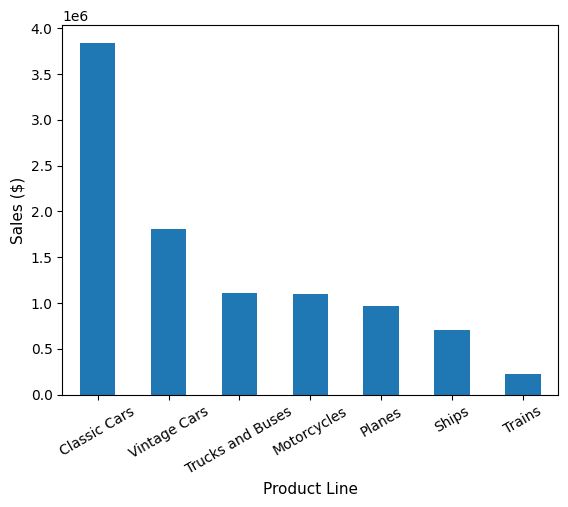

In [77]:
df.groupby('Productline')['Sales'].sum().sort_values(ascending=False).plot(kind='bar');
plt.xlabel('Product Line', fontsize = 11);
plt.ylabel('Sales (million USD)', fontsize=11);
plt.xticks(rotation=30);

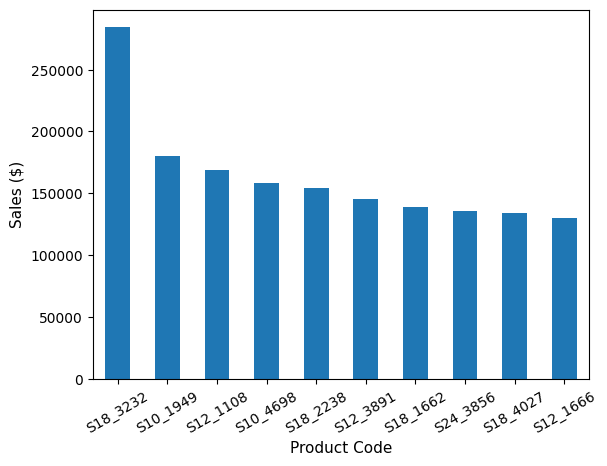

In [78]:
df.groupby('Productcode')['Sales'].sum().sort_values(ascending=False).head(10).plot(kind='bar');
plt.xlabel('Product Code', fontsize = 11);
plt.ylabel('Sales (USD)', fontsize=11);
plt.xticks(rotation=30);

In [ ]:
df['Customername'].value_counts().head(10).plot(kind='bar');
plt.xlabel('Customer Name', fontsize = 11);
plt.ylabel('No. of Orders', fontsize=11);
plt.xticks();

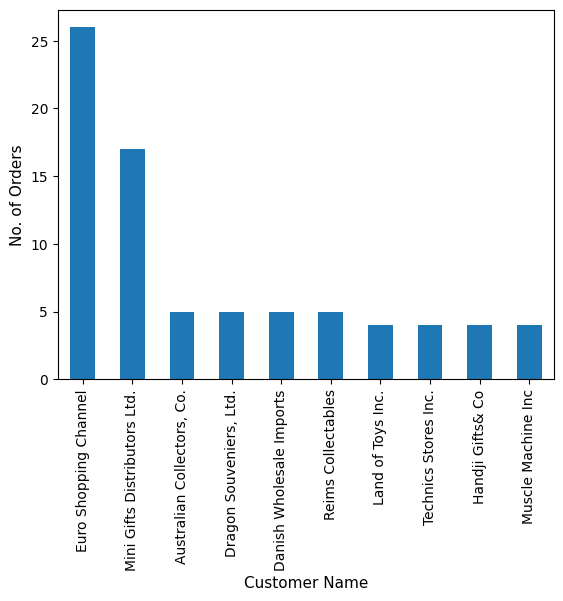

In [99]:
df.groupby('Customername')['Ordernumber'].nunique().sort_values(ascending=False).head(10).plot(kind='bar');
plt.xlabel('Customer Name', fontsize = 11);
plt.ylabel('No. of Orders', fontsize=11);
plt.xticks();

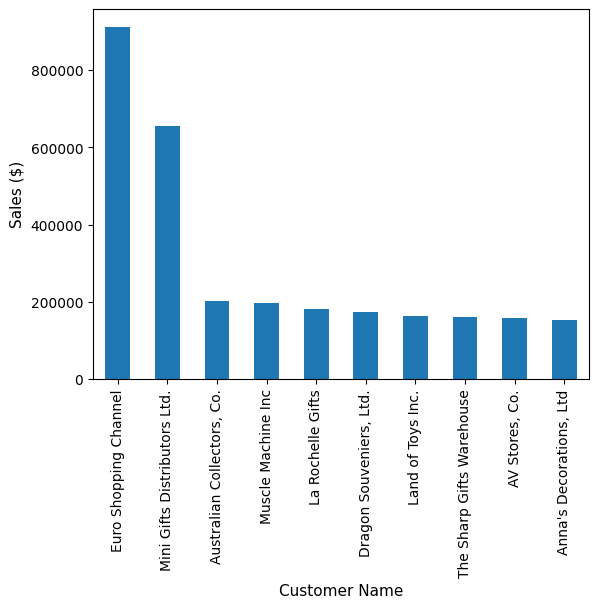

In [84]:
df.groupby('Customername')['Sales'].sum().sort_values(ascending=False).head(10).plot(kind='bar');
plt.xlabel('Customer Name', fontsize = 11);
plt.ylabel('Sales (million USD)', fontsize=11);
plt.xticks();

In [ ]:
df.groupby('City')['Ordernumber'].nunique().sort_values(ascending=False).head(10).plot(kind='bar');
plt.xlabel('City', fontsize = 11);
plt.ylabel('No. of Orders', fontsize=11);
plt.xticks(rotation=45);

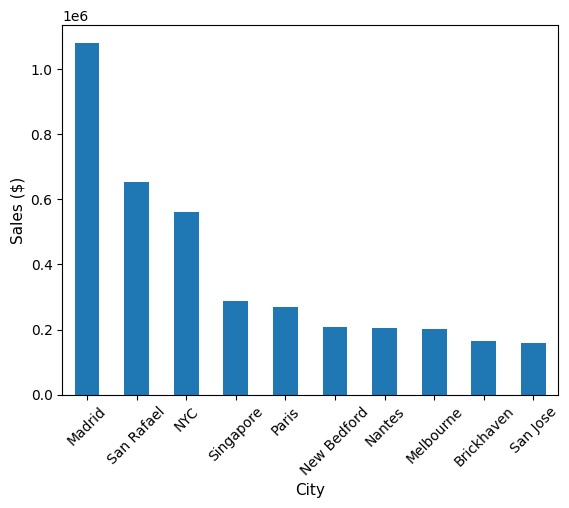

In [88]:
df.groupby('City')['Sales'].sum().sort_values(ascending=False).head(10).plot(kind='bar');
plt.xlabel('City', fontsize = 11);
plt.ylabel('Sales (million USD)', fontsize=11);
plt.xticks(rotation=45);

In [ ]:
df.groupby('Country')['Ordernumber'].nunique().sort_values(ascending=False).head(10).plot(kind='bar');
plt.xlabel('Country', fontsize = 11);
plt.ylabel('No. of Orders', fontsize=11);
plt.xticks(rotation=45);

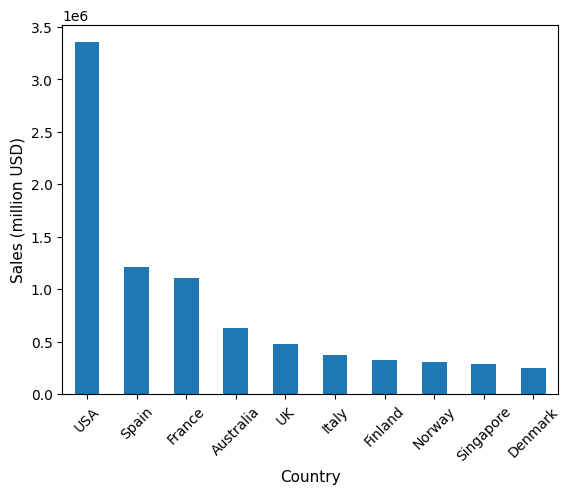

In [94]:
df.groupby('Country')['Sales'].sum().sort_values(ascending=False).head(10).plot(kind='bar');
plt.xlabel('Country', fontsize = 11);
plt.ylabel('Sales (million USD)', fontsize=11);
plt.xticks(rotation=45);

In [ ]:
df.groupby('Dealsize')['Ordernumber'].nunique().sort_values(ascending=False).head(10).plot(kind='bar');

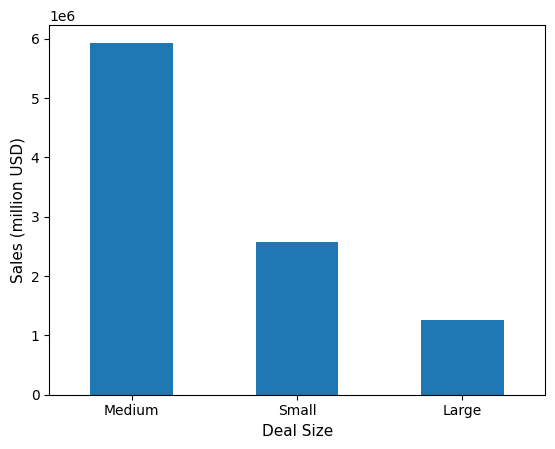

In [102]:
df.groupby('Dealsize')['Sales'].sum().sort_values(ascending=False).head(10).plot(kind='bar');
plt.xlabel('Deal Size', fontsize = 11);
plt.ylabel('Sales (million USD)', fontsize=11);
plt.xticks(rotation=0);

In [31]:
df['Customername'].nunique()

89

In [32]:
df['Orderdate'] = pd.to_datetime(df['Orderdate'])

In [33]:
weekly_sales = df.resample('W', on='Orderdate').sum()['Sales']

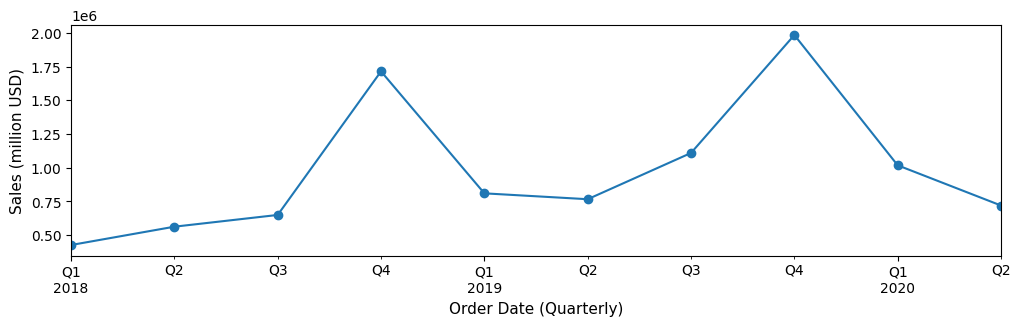

In [103]:
df.resample('QE', on='Orderdate').sum()['Sales'].plot(marker='o',figsize=(12,3));
plt.xlabel('Order Date (Quarterly)', fontsize = 11);
plt.ylabel('Sales (million USD)', fontsize=11);
plt.xticks(rotation=0);

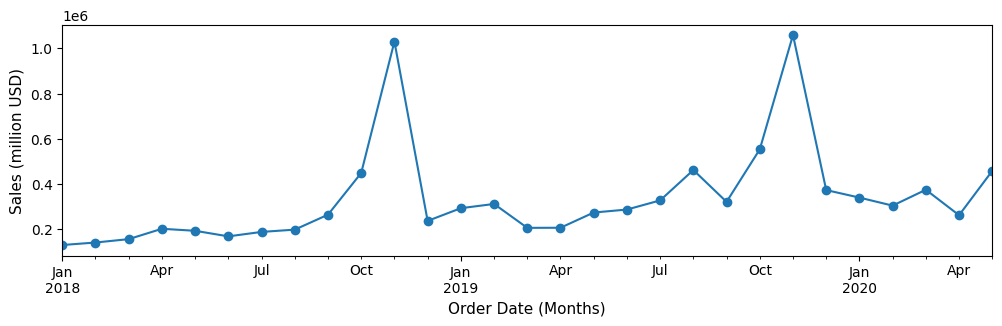

In [97]:
df.resample('ME', on='Orderdate').sum()['Sales'].plot(marker='o',figsize=(12,3));
plt.xlabel('Order Date (Months)', fontsize = 11);
plt.ylabel('Sales (million USD)', fontsize=11);
plt.xticks(rotation=0);

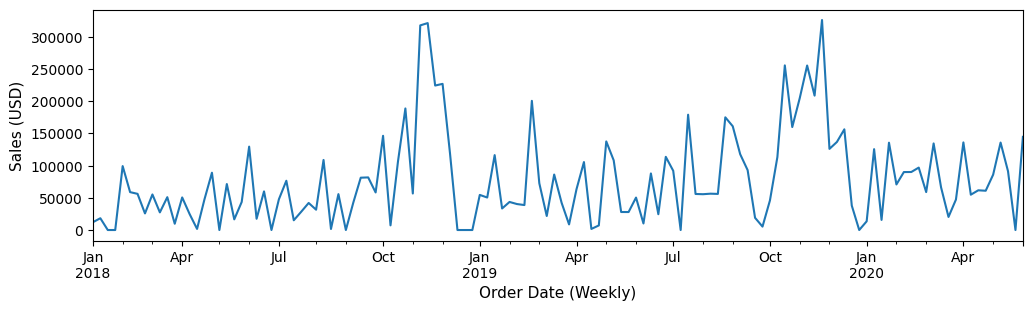

In [98]:
weekly_sales.plot(kind='line', figsize=(12,3));
plt.xlabel('Order Date (Weekly)', fontsize = 11);
plt.ylabel('Sales (USD)', fontsize=11);
plt.xticks(rotation=0);